In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/cow"

birth.csv	    predict_0115_5.csv	predict_0118_6.csv  submission.csv
breed.csv	    predict_0118_1.csv	predict_0118_7.csv  test.csv
predict_0115_1.csv  predict_0118_2.csv	predict_0118_8.csv  train.csv
predict_0115_2.csv  predict_0118_3.csv	predict_0118.csv
predict_0115_3.csv  predict_0118_4.csv	report.csv
predict_0115_4.csv  predict_0118_5.csv	spec.csv


In [ ]:
import pandas as pd
train=pd.read_csv('/content/drive/My Drive/cow/train.csv',sep=',')
test=pd.read_csv('/content/drive/My Drive/cow/test.csv',sep=',')
birth=pd.read_csv('/content/drive/My Drive/cow/birth.csv',sep=',')
spec=pd.read_csv('/content/drive/My Drive/cow/spec.csv',sep=',')

train

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,29.4,2013/1/1 00:00,2013/3/20 00:00,26,2013/3/21 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,27.8,2013/1/1 00:00,2013/4/18 00:00,27,2013/4/19 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,9.0,2013/1/1 00:00,2013/5/21 00:00,28,2013/5/22 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,13.0,2013/1/1 00:00,2013/6/25 00:00,29,2013/6/26 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,13.2,2013/1/1 00:00,2013/7/30 00:00,30,2013/7/31 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33249,37513,2014,1,C,93184912,14H1999,85171537,2003/3/8 00:00,8,12.0,20.0,2014/1/8 00:00,2014/1/20 00:00,130,2014/1/21 00:00,NaN,NaN,0,2012/11/16 00:00,NaN,NaN
33250,37514,2014,5,C,93184912,14H1999,85171537,2003/3/8 00:00,8,137.0,21.0,2014/1/8 00:00,2014/5/25 00:00,134,2014/5/26 00:00,NaN,NaN,0,2012/11/16 00:00,NaN,NaN
33251,37515,2014,6,C,93184912,14H1999,85171537,2003/3/8 00:00,8,168.0,19.0,2014/1/8 00:00,2014/6/25 00:00,135,2014/6/26 00:00,NaN,NaN,0,2012/11/16 00:00,NaN,NaN
33252,37516,2014,7,C,93184912,14H1999,85171537,2003/3/8 00:00,8,197.0,12.0,2014/1/8 00:00,2014/7/24 00:00,136,2014/7/25 00:00,NaN,NaN,0,2012/11/16 00:00,NaN,NaN


In [ ]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

new_train=pd.DataFrame(data=train,columns=['2','3','4','5','6','7','9','10','14','17','18','21','health','weight','times','11'])
new_test=pd.DataFrame(data=test,columns=['2','3','4','5','6','7','9','10','14','17','18','21','health','weight','times'])

new_train

,2,3,4,5,6,7,9,10,14,17,18,21,health,weight,times,11
0,2013,3,A,52612,507H7173,96040545,1,78.0,26,507H11621,1,501H8784,NaN,NaN,NaN,29.4
1,2013,4,A,52612,507H7173,96040545,1,107.0,27,507H11621,1,501H8784,NaN,NaN,NaN,27.8
2,2013,5,A,52612,507H7173,96040545,1,140.0,28,507H11621,2,501H8784,NaN,NaN,NaN,9.0
3,2013,6,A,52612,507H7173,96040545,1,175.0,29,507H11621,2,501H8784,NaN,NaN,NaN,13.0
4,2013,7,A,52612,507H7173,96040545,1,210.0,30,507H11621,2,501H8784,NaN,NaN,NaN,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33249,2014,1,C,93184912,14H1999,85171537,8,12.0,130,NaN,0,NaN,NaN,NaN,NaN,20.0
33250,2014,5,C,93184912,14H1999,85171537,8,137.0,134,NaN,0,NaN,NaN,NaN,NaN,21.0
33251,2014,6,C,93184912,14H1999,85171537,8,168.0,135,NaN,0,NaN,NaN,NaN,NaN,19.0
33252,2014,7,C,93184912,14H1999,85171537,8,197.0,136,NaN,0,NaN,NaN,NaN,NaN,12.0


In [ ]:
#train有不需要判斷的編號就去掉
for i in range(len(new_test['5'])):
    if len(new_train.index[new_train['5'] == new_test['5'][i]]) == 0:
        new_train=new_train.drop([i])
new_train.reset_index(inplace=True)
for i in range(len(new_train['11'])):
    if new_train['11'][i] == 0:
        new_train = new_train.drop([i])
new_train.reset_index(inplace=True)
new_train

,level_0,index,2,3,4,5,6,7,9,10,14,17,18,21,health,weight,times,11
0,0,0,2013,3,A,52612,507H7173,96040545,1,78.0,26,507H11621,1,501H8784,NaN,NaN,NaN,29.4
1,1,1,2013,4,A,52612,507H7173,96040545,1,107.0,27,507H11621,1,501H8784,NaN,NaN,NaN,27.8
2,2,2,2013,5,A,52612,507H7173,96040545,1,140.0,28,507H11621,2,501H8784,NaN,NaN,NaN,9.0
3,3,3,2013,6,A,52612,507H7173,96040545,1,175.0,29,507H11621,2,501H8784,NaN,NaN,NaN,13.0
4,4,4,2013,7,A,52612,507H7173,96040545,1,210.0,30,507H11621,2,501H8784,NaN,NaN,NaN,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32490,32557,33249,2014,1,C,93184912,14H1999,85171537,8,12.0,130,NaN,0,NaN,NaN,NaN,NaN,20.0
32491,32558,33250,2014,5,C,93184912,14H1999,85171537,8,137.0,134,NaN,0,NaN,NaN,NaN,NaN,21.0
32492,32559,33251,2014,6,C,93184912,14H1999,85171537,8,168.0,135,NaN,0,NaN,NaN,NaN,NaN,19.0
32493,32560,33252,2014,7,C,93184912,14H1999,85171537,8,197.0,136,NaN,0,NaN,NaN,NaN,NaN,12.0


In [ ]:
##train對上疾病資料，當年當月有病就1，反之0
from datetime import datetime
for i in range(len(spec)):
    dd=datetime.strptime(spec['4'][i], "%Y/%m/%d %H:%M")
    if len(new_train.index[new_train['5'] == spec['1'][i]])>0:
        for j in new_train.index[new_train['5'] == spec['1'][i]]:
            if new_train['2'][j] == dd.year and new_train['3'][j] == dd.month and new_train['4'][j]==spec['7'][i]:
                new_train['health'][j] = 1
    if len(new_test.index[new_test['5'] == spec['1'][i]])>0:
        for j in new_test.index[new_test['5'] == spec['1'][i]]:
            if new_test['2'][j] == dd.year and new_test['3'][j] == dd.month and new_test['4'][j]==spec['7'][i]:
                new_test['health'][j] = 1
                
for i in range(len(birth)):
    if len(new_train.index[new_train['5'] == birth['1'][i]])>0:
        for j in new_train.index[new_train['5'] == birth['1'][i]]:
                new_train['weight'][j] = birth['6'][i]
    if len(new_test.index[new_test['5'] == birth['1'][i]])>0:
        for j in new_test.index[new_test['5'] == birth['1'][i]]:
                new_test['weight'][j] = birth['6'][i]

avg_weight = birth['6'].mean()             
new_train['weight'] = new_train['weight'].fillna(avg_weight)
new_test['weight'] = new_test['weight'].fillna(avg_weight)

串流輸出內容已截斷至最後 5000 行。
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A

In [ ]:
new_train=new_train.fillna(0)
new_test=new_test.fillna(0)

In [ ]:
new_train.reset_index(inplace=True,drop=True)

In [ ]:
new_train

,level_0,index,2,3,4,5,6,7,9,10,14,17,18,21,health,weight,times,11
0,0,0,2013,3,A,52612,507H7173,96040545,1,78.0,26,507H11621,1,501H8784,0.0,576.584507,0.0,29.4
1,1,1,2013,4,A,52612,507H7173,96040545,1,107.0,27,507H11621,1,501H8784,0.0,576.584507,0.0,27.8
2,2,2,2013,5,A,52612,507H7173,96040545,1,140.0,28,507H11621,2,501H8784,0.0,576.584507,0.0,9.0
3,3,3,2013,6,A,52612,507H7173,96040545,1,175.0,29,507H11621,2,501H8784,0.0,576.584507,0.0,13.0
4,4,4,2013,7,A,52612,507H7173,96040545,1,210.0,30,507H11621,2,501H8784,0.0,576.584507,0.0,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32490,32557,33249,2014,1,C,93184912,14H1999,85171537,8,12.0,130,0,0,0,0.0,725.000000,0.0,20.0
32491,32558,33250,2014,5,C,93184912,14H1999,85171537,8,137.0,134,0,0,0,0.0,725.000000,0.0,21.0
32492,32559,33251,2014,6,C,93184912,14H1999,85171537,8,168.0,135,0,0,0,0.0,725.000000,0.0,19.0
32493,32560,33252,2014,7,C,93184912,14H1999,85171537,8,197.0,136,0,0,0,0.0,725.000000,0.0,12.0


In [ ]:
for i in range(len(new_train['3'])):

    if int(new_train['9'][i]) <=2:
        new_train['times'][i] = 0
    elif int(new_train['9'][i]) >=7:
        new_train['times'][i] = 2
    else:
        new_train['times'][i] = 1

for i in range(len(new_test['3'])):
    
    if int(new_test['9'][i]) <=2:
        new_test['times'][i] = 0
    elif int(new_test['9'][i]) >=7:
        new_test['times'][i] = 2
    else:
        new_test['times'][i] = 1
new_train
new_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: Sett

,2,3,4,5,6,7,9,10,14,17,18,21,health,weight,times
0,2019,1,A,52631,501H9952,97040152,4,435,94,551HO00657,6,614HO07276,0.0,576.584507,1.0
1,2019,2,A,52640,501H9952,96040567,4,13,94,551HO00695,0,551HO00695,0.0,576.584507,1.0
2,2019,3,A,52640,501H9952,96040567,4,35,95,551HO00695,1,551HO00695,0.0,576.584507,1.0
3,2019,4,A,52640,501H9952,96040567,4,70,96,551HO00695,1,551HO00695,0.0,576.584507,1.0
4,2019,5,A,52640,501H9952,96040567,4,98,97,551HO00695,1,551HO00695,1.0,576.584507,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,2019,6,C,6187446,001HO11511,4170458,1,15,24,001HO12901,0,001HO12901,0.0,540.000000,0.0
4259,2019,6,C,6187448,001HO11511,3172306,1,22,24,0,0,0,0.0,490.000000,0.0
4260,2019,6,C,6187449,001HO11511,2176835,1,21,22,0,0,0,0.0,540.000000,0.0
4261,2019,7,C,6187449,001HO11511,2176835,1,51,23,0,0,0,0.0,540.000000,0.0


In [ ]:
new_train

,level_0,index,2,3,4,5,6,7,9,10,14,17,18,21,health,weight,times,11
0,0,0,2013,3,A,52612,507H7173,96040545,1,78.0,26,507H11621,1,501H8784,0.0,576.584507,0.0,29.4
1,1,1,2013,4,A,52612,507H7173,96040545,1,107.0,27,507H11621,1,501H8784,0.0,576.584507,0.0,27.8
2,2,2,2013,5,A,52612,507H7173,96040545,1,140.0,28,507H11621,2,501H8784,0.0,576.584507,0.0,9.0
3,3,3,2013,6,A,52612,507H7173,96040545,1,175.0,29,507H11621,2,501H8784,0.0,576.584507,0.0,13.0
4,4,4,2013,7,A,52612,507H7173,96040545,1,210.0,30,507H11621,2,501H8784,0.0,576.584507,0.0,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32490,32557,33249,2014,1,C,93184912,14H1999,85171537,8,12.0,130,0,0,0,0.0,725.000000,2.0,20.0
32491,32558,33250,2014,5,C,93184912,14H1999,85171537,8,137.0,134,0,0,0,0.0,725.000000,2.0,21.0
32492,32559,33251,2014,6,C,93184912,14H1999,85171537,8,168.0,135,0,0,0,0.0,725.000000,2.0,19.0
32493,32560,33252,2014,7,C,93184912,14H1999,85171537,8,197.0,136,0,0,0,0.0,725.000000,2.0,12.0


In [ ]:
new_train['6']=new_train['6'].fillna("NoData").astype("str")
new_test['6']=new_test['6'].fillna("NoData").astype("str")
new_train['7']=new_train['7'].fillna("NoData").astype("str")
new_test['7']=new_test['7'].fillna("NoData").astype("str")
new_train['21']=new_train['21'].fillna("NoData").astype("str")
new_test['21']=new_test['21'].fillna("NoData").astype("str")
new_train['17']=new_train['17'].fillna("NoData").astype("str")
new_test['17']=new_test['17'].fillna("NoData").astype("str")

new_train.dropna(subset=['10','6','7'], inplace=True)
new_train

,level_0,index,2,3,4,5,6,7,9,10,14,17,18,21,health,weight,times,11
0,0,0,2013,3,A,52612,507H7173,96040545,1,78.0,26,507H11621,1,501H8784,0.0,576.584507,0.0,29.4
1,1,1,2013,4,A,52612,507H7173,96040545,1,107.0,27,507H11621,1,501H8784,0.0,576.584507,0.0,27.8
2,2,2,2013,5,A,52612,507H7173,96040545,1,140.0,28,507H11621,2,501H8784,0.0,576.584507,0.0,9.0
3,3,3,2013,6,A,52612,507H7173,96040545,1,175.0,29,507H11621,2,501H8784,0.0,576.584507,0.0,13.0
4,4,4,2013,7,A,52612,507H7173,96040545,1,210.0,30,507H11621,2,501H8784,0.0,576.584507,0.0,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32490,32557,33249,2014,1,C,93184912,14H1999,85171537,8,12.0,130,0,0,0,0.0,725.000000,2.0,20.0
32491,32558,33250,2014,5,C,93184912,14H1999,85171537,8,137.0,134,0,0,0,0.0,725.000000,2.0,21.0
32492,32559,33251,2014,6,C,93184912,14H1999,85171537,8,168.0,135,0,0,0,0.0,725.000000,2.0,19.0
32493,32560,33252,2014,7,C,93184912,14H1999,85171537,8,197.0,136,0,0,0,0.0,725.000000,2.0,12.0


In [ ]:
new_train = pd.get_dummies(new_train)
new_train.head(5)

,level_0,index,2,3,5,9,10,14,18,health,weight,times,11,4_A,4_B,4_C,6_0,6_0007HO08778,6_001HO02611,6_001HO02724,6_001HO02747,6_001HO07173,6_001HO07235,6_001HO08784,6_001HO08812,6_001HO09225,6_001HO09527,6_001HO09593,6_001HO09952,6_001HO8784,6_005HO53812,6_005HO54028,6_005HO54241,6_005HO54242,6_005HO54243,6_005HO54312,6_007HO06055,6_007HO06838,6_007HO07536,6_007HO08361,...,21_614HO07811,21_7H10217,21_7H10233,21_7H10272,21_7H10406,21_7H10433,21_7H10550,21_7H10604,21_7H10624,21_7H10690,21_7H10721,21_7H10723,21_7H10884,21_7H11030,21_7H11207,21_7H11283,21_7H11456,21_7H11581,21_7H11585,21_7H12175,21_7H1585,21_7H7532,21_7H7536,21_7H7763,21_7H8350,21_7H8559,21_7H8778,21_7H8787,21_7H9222,21_7H9281,21_7H9346,21_7H9754,21_7H9900,21_7H9925,21_7H9961,21_H01,21_H02,21_J5H54028,21_JP5H54028,21_T222
0,0,0,2013,3,52612,1,78.0,26,1,0.0,576.584507,0.0,29.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,2013,4,52612,1,107.0,27,1,0.0,576.584507,0.0,27.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,2013,5,52612,1,140.0,28,2,0.0,576.584507,0.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,2013,6,52612,1,175.0,29,2,0.0,576.584507,0.0,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,2013,7,52612,1,210.0,30,2,0.0,576.584507,0.0,13.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_train

,level_0,index,2,3,5,9,10,14,18,health,weight,times,11,4_A,4_B,4_C,6_0,6_0007HO08778,6_001HO02611,6_001HO02724,6_001HO02747,6_001HO07173,6_001HO07235,6_001HO08784,6_001HO08812,6_001HO09225,6_001HO09527,6_001HO09593,6_001HO09952,6_001HO8784,6_005HO53812,6_005HO54028,6_005HO54241,6_005HO54242,6_005HO54243,6_005HO54312,6_007HO06055,6_007HO06838,6_007HO07536,6_007HO08361,...,21_614HO07811,21_7H10217,21_7H10233,21_7H10272,21_7H10406,21_7H10433,21_7H10550,21_7H10604,21_7H10624,21_7H10690,21_7H10721,21_7H10723,21_7H10884,21_7H11030,21_7H11207,21_7H11283,21_7H11456,21_7H11581,21_7H11585,21_7H12175,21_7H1585,21_7H7532,21_7H7536,21_7H7763,21_7H8350,21_7H8559,21_7H8778,21_7H8787,21_7H9222,21_7H9281,21_7H9346,21_7H9754,21_7H9900,21_7H9925,21_7H9961,21_H01,21_H02,21_J5H54028,21_JP5H54028,21_T222
0,0,0,2013,3,52612,1,78.0,26,1,0.0,576.584507,0.0,29.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,2013,4,52612,1,107.0,27,1,0.0,576.584507,0.0,27.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,2013,5,52612,1,140.0,28,2,0.0,576.584507,0.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,2013,6,52612,1,175.0,29,2,0.0,576.584507,0.0,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,2013,7,52612,1,210.0,30,2,0.0,576.584507,0.0,13.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32490,32557,33249,2014,1,93184912,8,12.0,130,0,0.0,725.000000,2.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32491,32558,33250,2014,5,93184912,8,137.0,134,0,0.0,725.000000,2.0,21.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32492,32559,33251,2014,6,93184912,8,168.0,135,0,0.0,725.000000,2.0,19.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32493,32560,33252,2014,7,93184912,8,197.0,136,0,0.0,725.000000,2.0,12.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
targets = new_train['11']
targets

0        29.4
1        27.8
2         9.0
3        13.0
4        13.2
         ... 
32490    20.0
32491    21.0
32492    19.0
32493    12.0
32494    10.0
Name: 11, Length: 32495, dtype: float64

In [ ]:
new_train = new_train.drop('11', axis = 1)
new_train = new_train.drop('level_0', axis = 1)
new_train = new_train.drop('index', axis = 1)
new_train

,2,3,5,9,10,14,18,health,weight,times,4_A,4_B,4_C,6_0,6_0007HO08778,6_001HO02611,6_001HO02724,6_001HO02747,6_001HO07173,6_001HO07235,6_001HO08784,6_001HO08812,6_001HO09225,6_001HO09527,6_001HO09593,6_001HO09952,6_001HO8784,6_005HO53812,6_005HO54028,6_005HO54241,6_005HO54242,6_005HO54243,6_005HO54312,6_007HO06055,6_007HO06838,6_007HO07536,6_007HO08361,6_007HO08778,6_007HO09321,6_007HO09346,...,21_614HO07811,21_7H10217,21_7H10233,21_7H10272,21_7H10406,21_7H10433,21_7H10550,21_7H10604,21_7H10624,21_7H10690,21_7H10721,21_7H10723,21_7H10884,21_7H11030,21_7H11207,21_7H11283,21_7H11456,21_7H11581,21_7H11585,21_7H12175,21_7H1585,21_7H7532,21_7H7536,21_7H7763,21_7H8350,21_7H8559,21_7H8778,21_7H8787,21_7H9222,21_7H9281,21_7H9346,21_7H9754,21_7H9900,21_7H9925,21_7H9961,21_H01,21_H02,21_J5H54028,21_JP5H54028,21_T222
0,2013,3,52612,1,78.0,26,1,0.0,576.584507,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2013,4,52612,1,107.0,27,1,0.0,576.584507,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013,5,52612,1,140.0,28,2,0.0,576.584507,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2013,6,52612,1,175.0,29,2,0.0,576.584507,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,7,52612,1,210.0,30,2,0.0,576.584507,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32490,2014,1,93184912,8,12.0,130,0,0.0,725.000000,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32491,2014,5,93184912,8,137.0,134,0,0.0,725.000000,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32492,2014,6,93184912,8,168.0,135,0,0.0,725.000000,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32493,2014,7,93184912,8,197.0,136,0,0.0,725.000000,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_train_list = list(new_train.columns)
new_train_list

In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_targets, test_targets = train_test_split(new_train, targets, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#500個決策樹
rf = RandomForestRegressor(n_estimators= 500, random_state=42)
rf.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(new_train_list, importances)]

#重要性從高到低排序
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: 10                   Importance: 0.32
Variable: 4_C                  Importance: 0.15
Variable: 5                    Importance: 0.05
Variable: 9                    Importance: 0.04
Variable: 14                   Importance: 0.04
Variable: 3                    Importance: 0.03
Variable: 2                    Importance: 0.02
Variable: 18                   Importance: 0.01
Variable: 4_A                  Importance: 0.01
Variable: 4_B                  Importance: 0.01
Variable: 17_0                 Importance: 0.01
Variable: health               Importance: 0.0
Variable: weight               Importance: 0.0
Variable: times                Importance: 0.0
Variable: 6_0                  Importance: 0.0
Variable: 6_0007HO08778        Importance: 0.0
Variable: 6_001HO02611         Importance: 0.0
Variable: 6_001HO02724         Importance: 0.0
Variable: 6_001HO02747         Importance: 0.0
Variable: 6_001HO07173         Importance: 0.0
Variable: 6_001HO07235         Importance: 0.0
Va

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#設定畫布風格
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, new_train_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

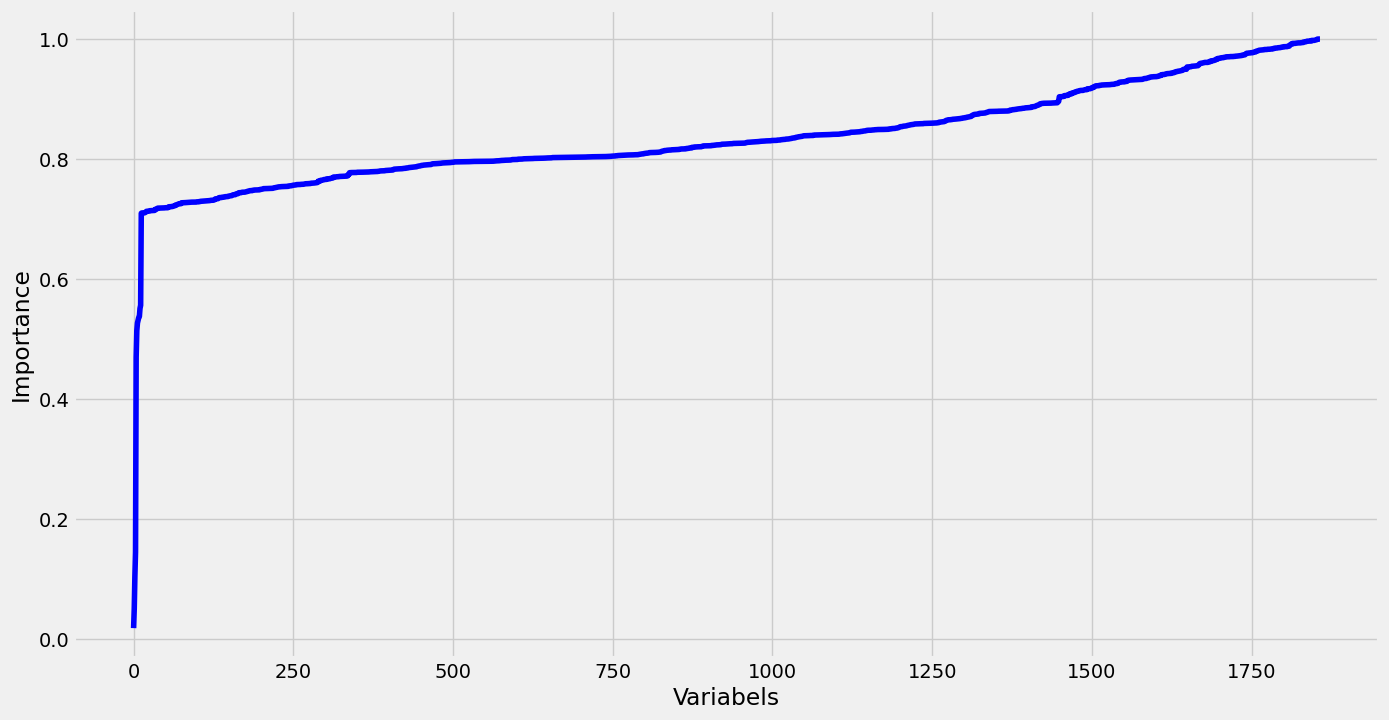

In [ ]:
import matplotlib.pyplot as plt   # 資料視覺化套件
from matplotlib.pyplot import figure
figure(num=None, figsize=(15,8), dpi=100)

x = list(range(1858))
y = importances

y_new = [0]
y_new[0] = y[0]

for i in range(0,1857):
    a =  y[i+1] + y_new[i]
    y_new.append(a)

plt.plot(x, y_new,c = "b")
#plt.title("Population Growth") # title
plt.ylabel("Importances") # y label
plt.xlabel("Variabels") # x label

plt.show()

